In [ ]:
#general pakages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

In [ ]:
amazon_reviews = pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv')
amazon_reviews.head(6)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


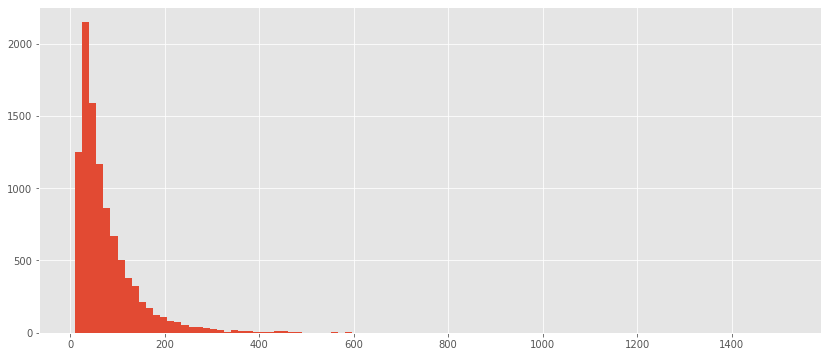

In [ ]:
words_per_review = amazon_reviews.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins=100)
plt.xlabel = ('Review length(words)')
plt.ylabel = ('Frequency')
plt.show()

In [ ]:
print('Average words ',words_per_review.mean())
print('Skewness',words_per_review.skew())

Average words  77.9028
Skewness 4.612459483340116


In [ ]:
percent_value = 100 *amazon_reviews['Score'].value_counts()/len(amazon_reviews)
percent_value

5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

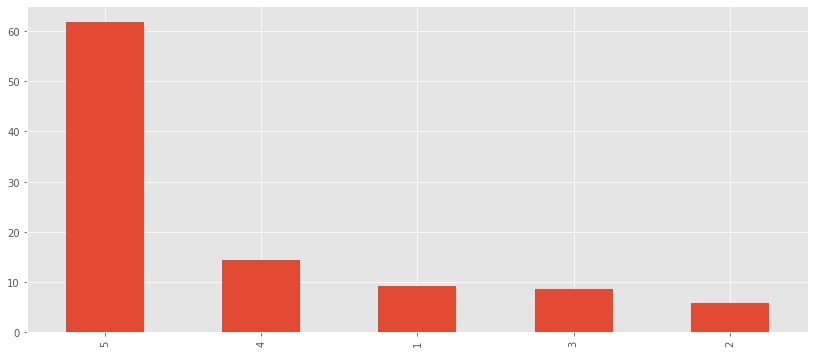

In [ ]:
percent_value.plot.bar()
plt.show()

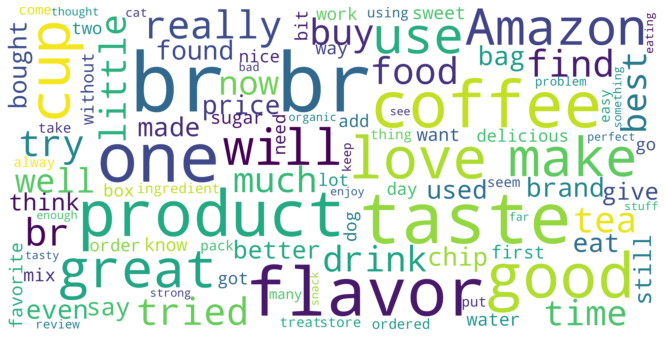

In [ ]:
word_cloud_text = ''.join(amazon_reviews['Text'])

wordcloud = WordCloud(max_font_size=100,
                      max_words=100,
                      background_color="white",
                      scale = 10,
                      width=800,
                      height=400
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud,
           interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
#map the ratings
amazon_reviews['Sentiment_rating'] = np.where(amazon_reviews.Score > 3,1,0)

# here we have to Remove neutral reviews
amazon_reviews = amazon_reviews[amazon_reviews.Score != 3]

#we are here printing the counts of each class
amazon_reviews['Sentiment_rating'].value_counts()

1    7616
0    1522
Name: Sentiment_rating, dtype: int64

In [ ]:
amazon_reviews['reviews_text_new'] = amazon_reviews['Text'].str.lower()

In [ ]:
from nltk import word_tokenize
nltk.download('punkt')

# Word tokenization example:
word_tokenize("Let's create a new system. It is awesome :D")
#print(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Let',
 "'s",
 'create',
 'a',
 'new',
 'system',
 '.',
 'It',
 'is',
 'awesome',
 ':',
 'D']

In [ ]:
# For reviews not converted to lower case
token_lists = [word_tokenize(each) for each in amazon_reviews['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))


# For reviews converted to lowe case
token_lists_lower = [word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  27510
Number of unique tokens now:  22474


In [ ]:
# Selecting non alpha numeric charactes that are not spaces

spl_chars = amazon_reviews['reviews_text_new'].apply(lambda review:
                                                     [char for char in list(review) if not char.isalnum() and char != ' '])

# Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

# Unique special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 ']',
 '^',
 '_',
 '`',
 '{',
 '}',
 '~',
 '§',
 '®'}

In [ ]:
review_backup = amazon_reviews['reviews_text_new'].copy()
amazon_reviews['reviews_text_new'] = amazon_reviews['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')


In [ ]:
print("- Old Review -")
print(review_backup.values[6])
print("\n- New Review -")
print(amazon_reviews['reviews_text_new'][6])

- Old Review -
this saltwater taffy had great flavors and was very soft and chewy.  each candy was individually wrapped well.  none of the candies were stuck together, which did happen in the expensive version, fralinger's.  would highly recommend this candy!  i served it at a beach-themed party and everyone loved it!

- New Review -
this saltwater taffy had great flavors and was very soft and chewy   each candy was individually wrapped well   none of the candies were stuck together  which did happen in the expensive version  fralinger s   would highly recommend this candy   i served it at a beach themed party and everyone loved it 


In [ ]:
token_lists = [word_tokenize(each) for each in amazon_reviews['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

token_lists = [word_tokenize(each) for each in amazon_reviews['reviews_text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))

Number of unique tokens then:  27510
Number of unique tokens now:  18039


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print('Available languages for NLTK v.3.10.9: ')
print(stopwords.fileids())

Available languages for NLTK v.3.10.9: 
['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = amazon_reviews['reviews_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 i have bought several of the vitality canned dog food products and have found them all to be of good quality  the product looks more like a stew than a processed meat and it smells better  my labrador is finicky and she appreciates this product better than  most 

-- Stopwords in the sentence --
 ['i', 'have', 'of', 'the', 'and', 'have', 'them', 'all', 'to', 'be', 'of', 'the', 'more', 'a', 'than', 'a', 'and', 'it', 'my', 'is', 'and', 'she', 'this', 'than', 'most']

-- Non-stopwords in the sentence --
 ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed', 'meat', 'smells', 'better', 'labrador', 'finicky', 'appreciates', 'product', 'better']


In [ ]:
def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

amazon_reviews['reviews_text_nonstop'] = amazon_reviews['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
amazon_reviews[['reviews_text_new','reviews_text_nonstop']]

,reviews_text_new,reviews_text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wid...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
9995,we switched from the advance similac to the or...,"[switched, advance, similac, organic, product,..."
9996,like the bad reviews say the organic formula ...,"[like, bad, reviews, say, organic, formula, co..."
9997,i wanted to solely breastfeed but was unable t...,"[wanted, solely, breastfeed, unable, keep, sup..."
9998,i love the fact that i can get this delieved t...,"[love, fact, get, delieved, house, delievy, ch..."


In [ ]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nltk.download('omw-1.4')
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


In [ ]:
def stemm_terms(row):
    return [lancaster.stem(term) for term in row]
def lemmatize_terms(row):
    return [lemmatizer.lemmatize(term) for term in row]

amazon_reviews['reviews_text_stemm'] = amazon_reviews['reviews_text_nonstop'].apply(lambda row: stemm_terms(row))
amazon_reviews['reviews_text_lemm'] = amazon_reviews['reviews_text_nonstop'].apply(lambda row: lemmatize_terms(row))
amazon_reviews[['reviews_text_nonstop','reviews_text_stemm','reviews_text_lemm']]

,reviews_text_nonstop,reviews_text_stemm,reviews_text_lemm
0,"[bought, several, vitality, canned, dog, food,...","[bought, sev, vit, can, dog, food, produc, fou...","[bought, several, vitality, canned, dog, food,..."
1,"[product, arrived, labeled, jumbo, salted, pea...","[produc, ar, label, jumbo, salt, peanut, peanu...","[product, arrived, labeled, jumbo, salted, pea..."
2,"[confection, around, centuries, light, pillowy...","[confect, around, century, light, pillowy, cit...","[confection, around, century, light, pillowy, ..."
3,"[looking, secret, ingredient, robitussin, beli...","[look, secret, ingredy, robitussin, believ, fo...","[looking, secret, ingredient, robitussin, beli..."
4,"[great, taffy, great, price, wide, assortment,...","[gre, taffy, gre, pric, wid, assort, yummy, ta...","[great, taffy, great, price, wide, assortment,..."
...,...,...,...
9995,"[switched, advance, similac, organic, product,...","[switch, adv, similac, org, produc, think, wou...","[switched, advance, similac, organic, product,..."
9996,"[like, bad, reviews, say, organic, formula, co...","[lik, bad, review, say, org, formul, constip, ...","[like, bad, review, say, organic, formula, con..."
9997,"[wanted, solely, breastfeed, unable, keep, sup...","[want, sol, breastfee, un, keep, suppl, formul...","[wanted, solely, breastfeed, unable, keep, sup..."
9998,"[love, fact, get, delieved, house, delievy, ch...","[lov, fact, get, deliev, hous, delievy, charg,...","[love, fact, get, delieved, house, delievy, ch..."


#Building ML Model

In [ ]:
amazon_reviews[['Text','Score','Sentiment_rating']].head(5)

,Text,Score,Sentiment_rating
0,I have bought several of the Vitality canned d...,5,1
1,Product arrived labeled as Jumbo Salted Peanut...,1,0
2,This is a confection that has been around a fe...,4,1
3,If you are looking for the secret ingredient i...,2,0
4,Great taffy at a great price. There was a wid...,5,1


In [ ]:
from nltk import ngrams

sentence = 'The quick brown fox jumps over the lazy dog'

for n in range(1, 10):
    print(str(n) + '-grams:\n', list(ngrams(sentence.split(), n)))

1-grams:
 [('The',), ('quick',), ('brown',), ('fox',), ('jumps',), ('over',), ('the',), ('lazy',), ('dog',)]
2-grams:
 [('The', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumps'), ('jumps', 'over'), ('over', 'the'), ('the', 'lazy'), ('lazy', 'dog')]
3-grams:
 [('The', 'quick', 'brown'), ('quick', 'brown', 'fox'), ('brown', 'fox', 'jumps'), ('fox', 'jumps', 'over'), ('jumps', 'over', 'the'), ('over', 'the', 'lazy'), ('the', 'lazy', 'dog')]
4-grams:
 [('The', 'quick', 'brown', 'fox'), ('quick', 'brown', 'fox', 'jumps'), ('brown', 'fox', 'jumps', 'over'), ('fox', 'jumps', 'over', 'the'), ('jumps', 'over', 'the', 'lazy'), ('over', 'the', 'lazy', 'dog')]
5-grams:
 [('The', 'quick', 'brown', 'fox', 'jumps'), ('quick', 'brown', 'fox', 'jumps', 'over'), ('brown', 'fox', 'jumps', 'over', 'the'), ('fox', 'jumps', 'over', 'the', 'lazy'), ('jumps', 'over', 'the', 'lazy', 'dog')]
6-grams:
 [('The', 'quick', 'brown', 'fox', 'jumps', 'over'), ('quick', 'brown', 'fox', 'jumps', 'over', '

In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(amazon_reviews['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,0003,000kwh,002,008,0100,0174,02,03,...,zomg,zon,zoo,zoom,zotz,zucchini,zuke,zukes,zupas,zuppa
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### Creating a python object of the class CountVectorizer

bag_ow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bag_ow_data = bag_ow_counts.fit_transform(amazon_reviews['reviews_text_new'])

In [ ]:
bag_ow_data

<9138x18039 sparse matrix of type '<class 'numpy.int64'>'
	with 493450 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_bag_ow, X_test_bag_ow, y_train_bag_ow, y_test_bag_ow = train_test_split(bag_ow_data,
                                                                                amazon_reviews['Sentiment_rating'],
                                                                                test_size = 0.2,
                                                                                random_state =0
                                                                                )

In [ ]:
y_test_bag_ow.value_counts()/y_test_bag_ow.shape[0]


1    0.847921
0    0.152079
Name: Sentiment_rating, dtype: float64

#Logistic training model

In [ ]:
### Training the model
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bag_ow, y_train_bag_ow) # Fitting a logistic regression model

## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bag_ow) # Class prediction

## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bag_ow, test_pred_lr_all))

F1 score:  0.9523504956827631
